# Create a Linear Model

**Basic Imports**

In [35]:
# Import "Linear Regression" module from sklearn
from sklearn.linear_model import LinearRegression
import utils_1
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Create an object of class LinearRegression
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Generate some data by importing a module 'load_data', which is implemented in utils_1. The features in 'X' are:

* Age: (years)
* Systolic_BP: Systolic blood pressue (mmHg)
* Diastolic_BP: Diastolic blood pressure (mmHg)
* Cholestrol: (mg/DL)

The labels in <mark>y</mark> indicate whether the patient has a diasease (diabetic retinopathy). 

* y = 1: patient has retinopathy
* y = 0: patient does not have retinopathy

In [4]:
# Import load_data function from the utils_1 module
from utils_1 import load_data

In [5]:
# Generate features and labels using the imported function
X, y = load_data(100)

In [6]:
# Explore the data by viewing the features and the labels 
X.head()

,Age,Systolic_BP,Diastolic_BP,Cholesterol
0,77.196340,78.379387,86.862625,83.344731
1,63.529850,85.439716,77.288707,107.483614
2,69.003986,98.406978,85.411057,118.495893
3,82.638210,100.362697,71.119650,87.737132
4,78.346286,121.854369,92.013270,99.121558


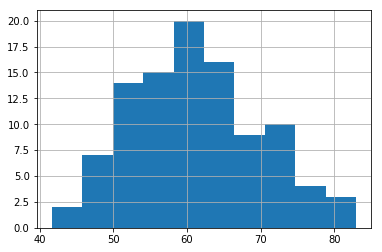

In [9]:
# Plot a histogram of the Age features
X['Age'].hist()

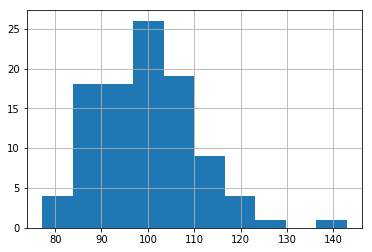

In [10]:
X['Systolic_BP'].hist()

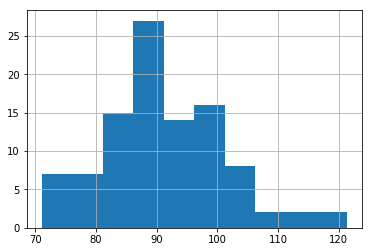

In [11]:
X['Diastolic_BP'].hist()

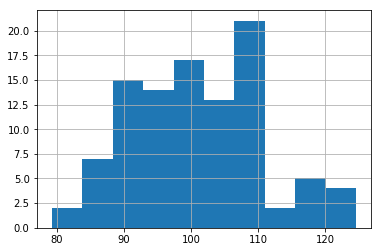

In [12]:
X['Cholesterol'].hist()

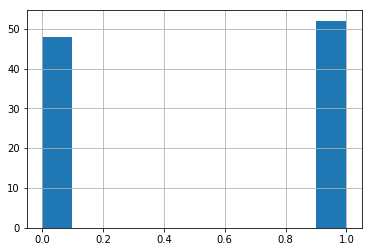

In [13]:
y.hist()

Fit the Linear Regression using features in <mark>X</mark> and labels in <mark>y</mark>. "Fit" is another way of saying that we are training the model on the data. 

In [14]:
# Fit the linear regression model
model.fit(X, y)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

- View the coefficients of the trained model.
- The coefficients are the 'weights' or $\beta$s associated with each feature
- You'll use the coefficients for making predictions.
$$\hat{y} = \beta_1x_1 + \beta_2x_2 + ... \beta_N x_N$$

In [15]:
# View the coefficients of the model
model.coef_

array([0.01341909, 0.00942119, 0.01241238, 0.00530774])

# Risk Scores using Pandas and Numpy

Here we will implement risk scores using the Python functions.
- Atrial fibrillation: Chads-vasc score
- Liver disease: MELD score
- Heart disease: ASCVD score

In [17]:
# Chads-vasc score
def chads_vasc_score(input_c, input_h, input_a2, input_d, input_s2, input_v, input_a, input_sc):
    # congestive heart failure
    coef_c = 1 
    
    # Coefficient for hypertension
    coef_h = 1 
    
    # Coefficient for Age >= 75 years
    coef_a2 = 2
    
    # Coefficient for diabetes mellitus
    coef_d = 1
    
    # Coefficient for stroke
    coef_s2 = 2
    
    # Coefficient for vascular disease
    coef_v = 1
    
    # Coefficient for age 65 to 74 years
    coef_a = 1
    
    # TODO Coefficient for female
    coef_sc = 1
    
    # Calculate the risk score
    risk_score = (input_c * coef_c) +\
                 (input_h * coef_h) +\
                 (input_a2 * coef_a2) +\
                 (input_d * coef_d) +\
                 (input_s2 * coef_s2) +\
                 (input_v * coef_v) +\
                 (input_a * coef_a) +\
                 (input_sc * coef_sc)
    
    return risk_score

## Calculate the risk score

Calculate the chads-vasc score for a patient who has the following attributes:
- Congestive heart failure? No
- Hypertension: yes
- Age 75 or older: no
- Diabetes mellitus: no
- Stroke: no
- Vascular disease: yes
- Age 65 to 74: no
- Female? : yes

In [19]:
# Calculate the patient's Chads-vasc risk score
tmp_c = 0
tmp_h = 1
tmp_a2 = 0
tmp_d = 0
tmp_s2 = 0
tmp_v = 1
tmp_a = 0
tmp_sc = 1

print(f"The chads-vasc score for this patient is",
      f"{chads_vasc_score(tmp_c, tmp_h, tmp_a2, tmp_d, tmp_s2, tmp_v, tmp_a, tmp_sc)}")

The chads-vasc score for this patient is 3


**Expected output**
```CPP
The chads-vasc score for this patient is 3
```

**Risk score for liver disease**

In [21]:
def liver_disease_mortality(input_creatine, input_bilirubin, input_inr):
    """
    Calculate the probability of mortality given that the patient has
    liver disease. 
    Parameters:
        Creatine: mg/dL
        Bilirubin: mg/dL
        INR: 
    """
    # Coefficient values
    coef_creatine = 0.957
    coef_bilirubin = 0.378
    coef_inr = 1.12
    intercept = 0.643 # Intercept is the inherent risk associated with the patient if 
    # each of the coefficients above are zero
    
    # Calculate the natural logarithm of input variables
    log_cre = np.log(input_creatine)
    log_bil = np.log(input_bilirubin)
    
    # TODO: Calculate the natural log of input_inr
    log_inr = np.log(input_inr)
    
    # Compute the output
    meld_score = (coef_creatine*log_cre) +\
                 (coef_bilirubin*log_bil) +\
                 (coef_inr*log_inr) +\
                 intercept
    
    meld_score = meld_score*10
    
    return meld_score

For a patient who has 
- Creatinine: 1 mg/dL
- Bilirubin: 2 mg/dL
- INR: 1.1

Calculate their MELD score

In [23]:
tmp_meld_score = liver_disease_mortality(1.0, 2.0, 1.1)
print(f"The patient's MELD score is: {tmp_meld_score:.2f}")

The patient's MELD score is: 10.12


**Expected output**
```CPP
The patient's MELD score is: 10.12
```

In [25]:
def ascvd(x_age,
          x_cho,
          x_hdl,
          x_sbp,
          x_smo,
          x_dia,
          verbose=False
         ):
    """
    Atherosclerotic Cardiovascular Disease
    (ASCVD) Risk Estimator Plus
    """
    
    # Define the coefficients
    b_age = 17.114
    b_cho = 0.94
    b_hdl = -18.92
    b_age_hdl = 4.475
    b_sbp = 27.82
    b_age_sbp = -6.087
    b_smo = 0.691
    b_dia = 0.874
    
    # Calculate the sum of the products of inputs and coefficients
    sum_prod =  b_age * np.log(x_age) + \
                b_cho * np.log(x_cho) + \
                b_hdl * np.log(x_hdl) + \
                b_age_hdl * np.log(x_age) * np.log(x_hdl) +\
                b_sbp * np.log(x_sbp) +\
                b_age_sbp * np.log(x_age) * np.log(x_sbp) +\
                b_smo * x_smo + \
                b_dia * x_dia
    
    if verbose:
        print(f"np.log(x_age):{np.log(x_age):.2f}")
        print(f"np.log(x_cho):{np.log(x_cho):.2f}")
        print(f"np.log(x_hdl):{np.log(x_hdl):.2f}")
        print(f"np.log(x_age) * np.log(x_hdl):{np.log(x_age) * np.log(x_hdl):.2f}")
        print(f"np.log(x_sbp): {np.log(x_sbp):2f}")
        print(f"np.log(x_age) * np.log(x_sbp): {np.log(x_age) * np.log(x_sbp):.2f}")
        print(f"sum_prod {sum_prod:.2f}")
        
    # TODO: Risk Score = 1 - (0.9533^( e^(sum - 86.61) ) )
    risk_score = 1 - (np.power(0.9533,np.exp(sum_prod - 86.61)))
    
    return risk_score

In [26]:
tmp_risk_score = ascvd(x_age=55,
                      x_cho=213,
                      x_hdl=50,
                      x_sbp=120,
                      x_smo=0,
                      x_dia=0, 
                      verbose=True
                      )
print(f"\npatient's ascvd risk score is {tmp_risk_score:.2f}")

np.log(x_age):4.01
np.log(x_cho):5.36
np.log(x_hdl):3.91
np.log(x_age) * np.log(x_hdl):15.68
np.log(x_sbp): 4.787492
np.log(x_age) * np.log(x_sbp): 19.19
sum_prod 86.17

patient's ascvd risk score is 0.03


**Expected output**
```CPP
patient's ascvd risk score is 0.03
```

# Interaction terms in Models

**Combining features**

Use f-strings to combine two strings.  There are other ways to do this, but Python's f-strings are quite useful.

In [28]:
feature_names = X.columns
feature_names

Index(['Age', 'Systolic_BP', 'Diastolic_BP', 'Cholesterol'], dtype='object')

In [29]:
name1 = feature_names[0]
name2 = feature_names[1]

print(f"name1: {name1}")
print(f"name2: {name2}")

name1: Age
name2: Systolic_BP


In [30]:
# Combine the names of two features into a single string, separated by '_&_' for clarity
combined_names = f"{name1}_&_{name2}"
combined_names

'Age_&_Systolic_BP'

In [31]:
X[combined_names] = X['Age'] + X['Systolic_BP']
X.head(2)

,Age,Systolic_BP,Diastolic_BP,Cholesterol,Age_&_Systolic_BP
0,77.19634,78.379387,86.862625,83.344731,155.575726
1,63.52985,85.439716,77.288707,107.483614,148.969566


**Why we multiply two features instead of adding**

In [34]:
# Generate a small dataset with two features
df = pd.DataFrame({'v1': [1,1,1,2,2,2,3,3,3],
                   'v2': [100,200,300,100,200,300,100,200,300]
                  })

# add the two features together
df['v1 + v2'] = df['v1'] + df['v2']

# multiply the two features together
df['v1 x v2'] = df['v1'] * df['v2']
df

,v1,v2,v1 + v2,v1 x v2
0,1,100,101,100
1,1,200,201,200
2,1,300,301,300
3,2,100,102,200
4,2,200,202,400
5,2,300,302,600
6,3,100,103,300
7,3,200,203,600
8,3,300,303,900


v1 + v2



v2,100,200,300
v1,,,
1,101,201,301
2,102,202,302
3,103,203,303


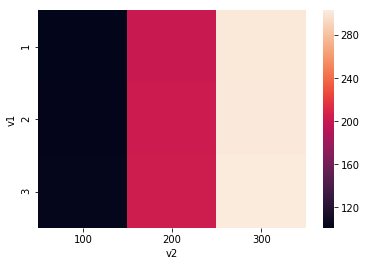

In [36]:
# Pivot the data so that v1 + v2 is the value

df_add = df.pivot(index='v1',
                  columns='v2',
                  values='v1 + v2'
                 )
print("v1 + v2\n")
display(df_add)
print()
sns.heatmap(df_add);

Notice that it doesn't seem like you can easily distinguish clearly when you vary feature 1 (which ranges from 1 to 3), since feature 2 is so much larger in magnitude (100 to 300).  This is because you added the two features together.

**View the 'multiply' interaction**

Now pivot the data so that:
- feature 1 is the row index 
- feature 2 is the column name.  
- The values are 'v1 x v2' 

Use a heatmap to visualize the table.

v1 x v2


v2,100,200,300
v1,,,
1,100,200,300
2,200,400,600
3,300,600,900


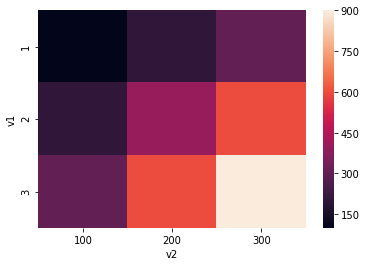

In [37]:
df_mult = df.pivot(index='v1',
                  columns='v2',
                  values='v1 x v2'
                 )
print('v1 x v2')
display(df_mult)
print()
sns.heatmap(df_mult);

Notice how when you multiply the features, the heatmap looks more like a 'grid' shape instead of three vertical bars.  

This means that you are more clearly able to make a distinction as feature 1 varies from 1 to 2 to 3.

**Discussion**

When you find the interaction between two features, you ideally hope to see how varying one feature makes an impact on the interaction term.  This is better achieved by multiplying the two features together rather than adding them together.  

Another way to think of this is that you want to separate the feature space into a "grid", which you can do by multiplying the features together.

# Concordance Index

In [38]:
# Define 'y', the outcome of the patient
y = pd.Series([0,0,1,1,0])
y.name='health'
y

0    0
1    0
2    1
3    1
4    0
Name: health, dtype: int64

In [39]:
# Define the risk scores
risk_score = pd.Series([2.2, 3.3, 4.4, 4.4])
risk_score.name='risk score'
risk_score

0    2.2
1    3.3
2    4.4
3    4.4
Name: risk score, dtype: float64

**Identify a permissible pair**

A pair of patients is permissible if their outcomes are different. Use code to compare the labels.

In [42]:
if y[0] != y[1]:
    print(f"y[0]={y[0]} and y[1]={y[1]} is a permissible pair")
else:
    print(f"y[0]={y[0]} and y[1]={y[1]} is not a permissible pair")

y[0]=0 and y[1]=0 is not a permissible pair


In [43]:
# Check if patients 0 and 2 make a permissible pair
if y[0] != y[2]:
    print(f"y[0]={y[0]} and y[2]={y[2]} is a permissible pair")
else:
    print(f"y[0]={y[0]} and y[2]={y[2]} is NOT permissible pair")

y[0]=0 and y[2]=1 is a permissible pair


**Check for risk ties**

* For permissible pairs, check if they have the same risk score. 

In [44]:
# Check if patients 2 and 3 make a risk tie
if risk_score[2] == risk_score[3]:
    print(f"patient 2 ({risk_score[2]}) and patient 3 ({risk_score[3]}) have a risk tie")
else:
    print(f"patient 2 ({risk_score[2]}) and patient 3 ({risk_score[3]}) DO NOT have a risk tie")

patient 2 (4.4) and patient 3 (4.4) have a risk tie


**Concordant pairs**

- Check if a permissible pair is also a concordant pair
- You'll check one case, where the first patient is healthy and the second has the disease.

In [45]:
# Check if patient 1 and 2 make a concordant pair
if y[1] == 0 and y[2] == 1:
    if risk_score[1] < risk_score[2]:
        print(f"patient 1 and 2 is a concordant pair")

patient 1 and 2 is a concordant pair


In [48]:
meld = 0.957*np.log(0.8) + 0.378*np.log(1.5) + 1.120*np.log(1.3) + 0.643

In [49]:
meld = meld * 10
print(meld)

8.765654084607775


In [50]:
np.log()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


-inf

# Diabetic Retinopathy
Retinopathy is an eye condition that causes changes to the blood vessels in the part of the eye called the retina.
This often leads to vision changes or blindness.
Diabetic patients are known to be at high risk for retinopathy. 
    
**Logistic Regression**   
Logistic regression is an appropriate analysis to use for predicting the probability of a binary outcome. In our case, this would be the probability of having or not having diabetic retinopathy.
Logistic Regression is one of the most commonly used algorithms for binary classification. It is used to find the best fitting model to describe the relationship between a set of features (also referred to as input, independent, predictor, or explanatory variables) and a binary outcome label (also referred to as an output, dependent, or response variable). Logistic regression has the property that the output prediction is always in the range $[0,1]$. Sometimes this output is used to represent a probability from 0%-100%, but for straight binary classification, the output is converted to either $0$ or $1$ depending on whether it is below or above a certain threshold, usually $0.5$.

It may be  confusing that the term regression appears in the name even though logistic regression is actually a classification algorithm, but that's just a name it was given for historical reasons.

In [51]:
X = pd.read_csv('X_data.csv', index_col=0)
y_df = pd.read_csv('y_data.csv', index_col=0)
y = y_df['y']

`X` and `y` are Pandas DataFrames that hold the data for 6,000 diabetic patients. 

In [53]:
from sklearn.model_selection import train_test_split

X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)

Plot the histograms of each column of <mark>X_train</mark> below:

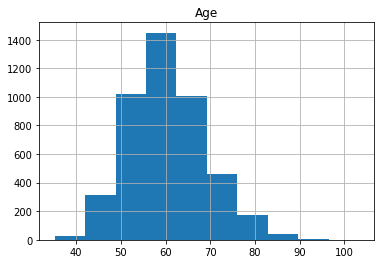

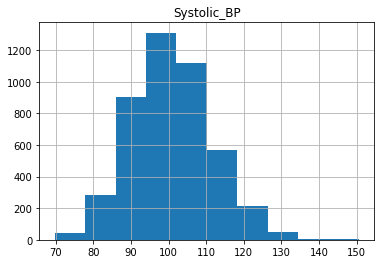

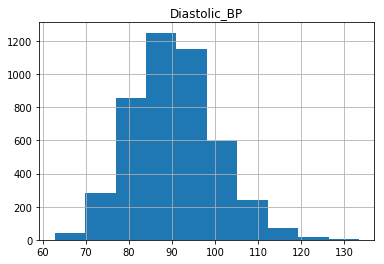

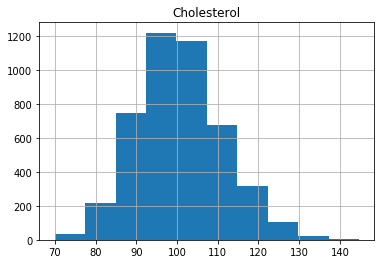

In [54]:
for col in X.columns:
    X_train_raw.loc[:, col].hist()
    plt.title(col)
    plt.show()

As we can see, the distributions have a generally bell shaped distribution, but with slight rightward skew.

Many statistical models assume that the data is normally distributed, forming a symmetric Gaussian bell shape (with no skew) more like the example below.

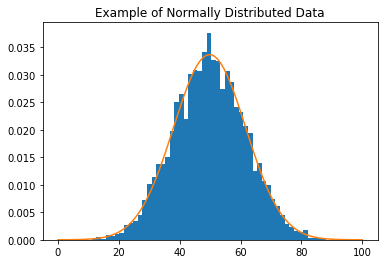

In [55]:
from scipy.stats import norm
data = np.random.normal(50,12, 5000)
fitting_params = norm.fit(data)
norm_dist_fitted = norm(*fitting_params)
t = np.linspace(0,100, 100)
plt.hist(data, bins=60, density=True)
plt.plot(t, norm_dist_fitted.pdf(t))
plt.title('Example of Normally Distributed Data')
plt.show()

We can transform our data to be closer to a normal distribution by removing the skew. One way to remove the skew is by applying the log function to the data.

Let's plot the log of the feature variables to see that it produces the desired effect.

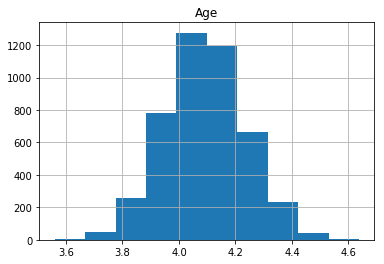

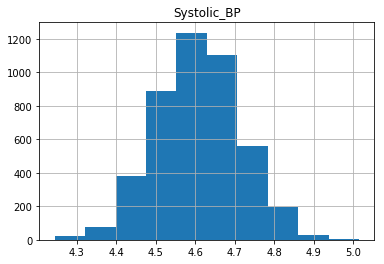

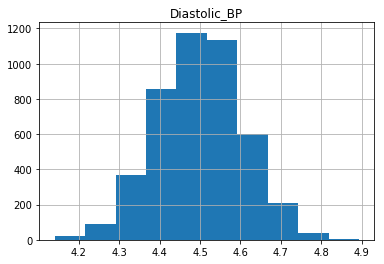

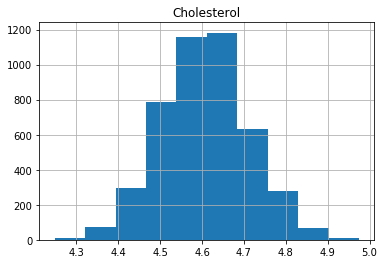

In [57]:
for col in X_train_raw.columns:
    np.log(X_train_raw.loc[:, col]).hist()
    plt.title(col)
    plt.show()

## Mean-Normalize the Data

First we will remove some of the skew from the distribution by using the log transformation.
Then we will "standardize" the distribution so that it has a mean of zero and standard deviation of 1. Recall that a standard normal distribution has mean of zero and standard deviation of 1. 

**Exercise 1**
* Write a function that first removes some of the skew in the data, and then standardizes the distribution so that for each data point $x$,
$$\overline{x} = \frac{x - mean(x)}{std(x)}$$
* Keep in mind that we want to pretend that the test data is "unseen" data. 
    * This implies that it is unavailable to us for the purpose of preparing our data, and so we do not want to consider it when evaluating the mean and standard deviation that we use in the above equation. Instead we want to calculate these values using the training data alone, but then use them for standardizing both the training and the test data.
    * For a further discussion on the topic, see this article ["Why do we need to re-use training parameters to transform test data"](https://sebastianraschka.com/faq/docs/scale-training-test.html).

**Note**
- For the sample standard deviation, please calculate the unbiased estimator:
$$s = \sqrt{\frac{\sum_{i=1}^n(x_{i} - \bar{x})^2}{n-1}}$$
- In other words, if you numpy, set the degrees of freedom `ddof` to 1.
- For pandas, the default `ddof` is already set to 1.

In [124]:
def make_standard_normal(df_train, df_test):
    """
    In order to make the data closer to a normal distribution, take log
    transforms to reduce the skew.
    Then standardize the distribution with a mean of zero and standard deviation of 1. 
  
    Args:
      df_train (dataframe): unnormalized training data.
      df_test (dataframe): unnormalized test data.
  
    Returns:
      df_train_normalized (dateframe): normalized training data.
      df_test_normalized (dataframe): normalized test data.
    """
    
    # Remove skew by applying the log function to the train set, and to the test set
    df_train_unskewed = np.log(df_train)
    df_test_unskewed = np.log(df_test)
    
    # Calculate the mean and standard deviation of the training set
    mean = np.mean(df_train_unskewed, axis=0)
    stdev = np.std(df_train_unskewed, axis=0, ddof=1)
    
    # Standardize the training set
    df_train_standardized = (df_train_unskewed - mean)/stdev
    
    # Standardize the test set
    df_test_standardized = (df_test_unskewed - mean)/stdev
    
    return df_train_standardized, df_test_standardized

**Test Your Work**

In [125]:
# test
tmp_train = pd.DataFrame({'field1': [1,2,10], 'field2': [4,5,11]})
tmp_test = pd.DataFrame({'field1': [1,3,10], 'field2': [4,6,11]})
tmp_train_transformed, tmp_test_transformed = make_standard_normal(tmp_train,tmp_test)

print(f"Training set transformed field1 has mean {tmp_train_transformed['field1'].mean(axis=0):.4f} and standard deviation {tmp_train_transformed['field1'].std(axis=0):.4f} ")
print(f"Test set transformed, field1 has mean {tmp_test_transformed['field1'].mean(axis=0):.4f} and standard deviation {tmp_test_transformed['field1'].std(axis=0):.4f}")
print(f"Skew of training set field1 before transformation: {tmp_train['field1'].skew(axis=0):.4f}")
print(f"Skew of training set field1 after transformation: {tmp_train_transformed['field1'].skew(axis=0):.4f}")
print(f"Skew of test set field1 before transformation: {tmp_test['field1'].skew(axis=0):.4f}")
print(f"Skew of test set field1 after transformation: {tmp_test_transformed['field1'].skew(axis=0):.4f}")

Training set transformed field1 has mean -0.0000 and standard deviation 1.0000 
Test set transformed, field1 has mean 0.1144 and standard deviation 0.9749
Skew of training set field1 before transformation: 1.6523
Skew of training set field1 after transformation: 1.0857
Skew of test set field1 before transformation: 1.3896
Skew of test set field1 after transformation: 0.1371


**Expected Output:**
    
```CPP
Training set transformed field1 has mean -0.0000 and standard deviation 1.0000 
Test set transformed, field1 has mean 0.1144 and standard deviation 0.9749
Skew of training set field1 before transformation: 1.6523
Skew of training set field1 after transformation: 1.0857
Skew of test set field1 before transformation: 1.3896
Skew of test set field1 after transformation: 0.1371
```

**Transform training and set data**

Using the above function to make the data distribution cloer to a standard normal distribution. 

In [62]:
X_train, X_test = make_standard_normal(X_train_raw, X_test_raw)

After transforming the training and test sets, we'll expect the training set to be centered at zero with a standard deviation of $1$.

We will avoid observing the test set during model training in order to avoid biasing the model training process, but let's have a look at the distributions of the transformed training data.

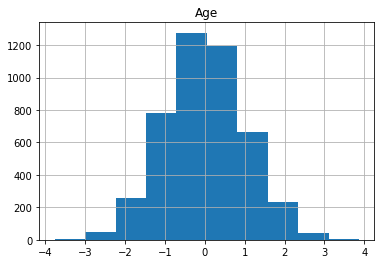

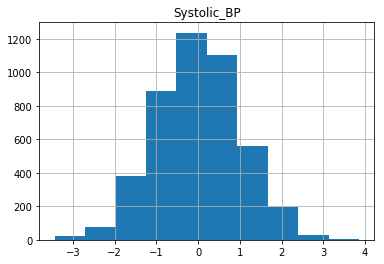

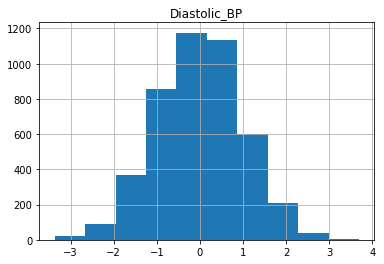

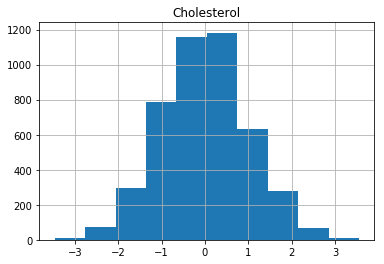

In [63]:
for col in X_train.columns:
    X_train[col].hist()
    plt.title(col)
    plt.show()

# Build the model

In [66]:
def lr_model(X_train, y_train):
    # Import the model
    from sklearn.linear_model import LogisticRegression
    
    # Create an object of class LogisticRegression
    model = LogisticRegression(solver='lbfgs')
    
    # Fit the model to the training data
    model = model.fit(X_train, y_train)
    
    return model

In [67]:
# Test
tmp_model = lr_model(X_train[0:3], y_train[0:3] )
print(tmp_model.predict(X_train[4:5]))
print(tmp_model.predict(X_train[5:6]))

[1.]
[1.]


**Expected Output:**
```CPP
[1.]
[1.]
```

Now that we've tested our model, let's go ahead and build it. 

In [68]:
model_X = lr_model(X_train, y_train)

## Evaluate the Model Using the C-index

Now that we have a model, we need to evaluate it. We'll do this using the c-index. 
* The c-index measures the discriminatory power of a risk score. 
* Intuitively, a higher c-index indicates that the model's prediction is in agreement with the actual outcomes of a pair of patients.
* The formula for the c-index is

$$ \mbox{cindex} = \frac{\mbox{concordant} + 0.5 \times \mbox{ties}}{\mbox{permissible}} $$

* A permissible pair is a pair of patients who have different outcomes.
* A concordant pair is a permissible pair in which the patient with the higher risk score also has the worse outcome.
* A tie is a permissible pair where the patients have the same risk score.

In [77]:
def cindex(y_true, scores):
    """
    Input:
    y_true (np.array): a 1-D array of true binary outcomes (values of zero or one)
        0: patient does not get the disease
        1: patient does get the disease
    scores (np.array): a 1-D array of corresponding risk scores output by the model

    Output:
    c_index (float): (concordant pairs + 0.5*ties) / number of permissible pairs
    """
    n = len(y_true)
    assert len(scores) == n
    
    concordant = 0
    permissible = 0
    ties = 0
    # Use two nested for loops to go through all unique pairs of patients
    for i in range(n):
        for j in range(i+1, n):
            
            # Check if the pair is permissible 
            if y_true[i] != y_true[j]:
                # Count the permissible pair
                permissible += 1
                
                # For permissible pairs, check if they are concordant or are ties         
                if scores[i] == scores[j]:
                    ties += 1
                    continue
                
                # case 1: patient i doesn't get the disease, patient j does
                if y_true[i] == 0 and y_true[j] == 1:
                    # Check if patient i has lower risk score than patient j
                    if scores[i] < scores[j]:
                        concordant += 1
                    # Otherwise if patient i has a higher risk score, it's not a concordant pair
                    # Already checked for ties earlier
            
                # case 2: patient i gets the disease, patient j does not
                if y_true[i] == 1 and y_true[j] == 0:
                    # Check if patient i has a higher risk score than patient j
                    if scores[i] > scores[j]:
                        concordant += 1
                    # Otherwise if patient i has a lower risk score, it's not a concordant pair. 
                    # We already checked for ties earlier
                    
    # Calculate the c-index using the count of permissible pairs, concordant pairs, and tied pairs. 
    c_index = (concordant + 0.5*ties)/permissible
    
    return c_index

In [78]:
# test
y_true = np.array([1.0, 0.0, 0.0, 1.0])

# Case 1
scores = np.array([0, 1, 1, 0])
print('Case 1 Output: {}'.format(cindex(y_true, scores)))

# Case 2
scores = np.array([1, 0, 0, 1])
print('Case 2 Output: {}'.format(cindex(y_true, scores)))

# Case 3
scores = np.array([0.5, 0.5, 0.0, 1.0])
print('Case 3 Output: {}'.format(cindex(y_true, scores)))
cindex(y_true, scores)

Case 1 Output: 0.0
Case 2 Output: 1.0
Case 3 Output: 0.875


0.875

# Evaluate the model on the test set

Now, we can evaluate your trained model on the test set.  

To get the predicted probabilities, we use the `predict_proba` method. This method will return the result from the model *before* it is converted to a binary 0 or 1. For each input case, it returns an array of two values which represent the probabilities for both the negative case (patient does not get the disease) and positive case (patient the gets the disease). 

In [79]:
scores = model_X.predict_proba(X_test)[:, 1]
c_index_X_test = cindex(y_test.values, scores)
print(f"c-index on test set is {c_index_X_test:.4f}")

c-index on test set is 0.8182


**Expected output:**
```CPP
c-index on test set is 0.8182
```

Let's plot the coefficients to see which variables (patient features) are having the most effect. You can access the model coefficients by using `model.coef_`

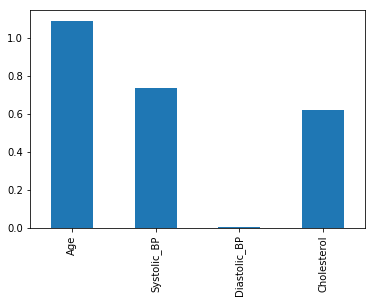

In [80]:
coeffs = pd.DataFrame(data = model_X.coef_, columns = X_train.columns)
coeffs.T.plot.bar(legend=None)

# Improve the model

You can try to improve your model by including interaction terms. 
* An interaction term is the product of two variables. 
    * For example, if we have data 
    $$ x = [x_1, x_2]$$
    * We could add the product so that:
    $$ \hat{x} = [x_1, x_2, x_1*x_2]$$

In [111]:
def add_interactions(X):
    """
    Add interaction terms between columns to dataframe.

    Args:
    X (dataframe): Original data

    Returns:
    X_int (dataframe): Original data with interaction terms appended. 
    """
    features = X.columns
    m = len(features)
    X_int = X.copy(deep=True)
    
    # 'i' loops through all features in the original dataframe X
    for i in range(m):
        
        # get the name of the feature 'i'
        feature_i_name = features[i]

        # get the data for feature 'i'
        feature_i_data = X[feature_i_name].values
    
        # choose the index of column 'j' to be greater than column 'i'
        for j in range(i+1, m):
            
            # get the name of feature 'j'
            feature_j_name = features[j]
            
            # get the data for feature 'j'
            feature_j_data = X[feature_j_name].values
            
            # create the name of the interaction feature by combining both name
            # f"{name1}_&_{name2}"
            feature_i_j_name = f"{feature_i_name}_x_{feature_j_name}"
            
            # Multiply the data for feature 'i' and feature 'j'
            # Store the result as a column in dataframe X_int
            X_int[feature_i_j_name] = feature_i_data*feature_j_data
            
    return X_int        

In [112]:
print("Original Data")
print(X_train.loc[:, ['Age', 'Systolic_BP']].head())
print("Data w/ Interactions")
print(add_interactions(X_train.loc[:, ['Age', 'Systolic_BP']].head()))

Original Data
           Age  Systolic_BP
1824 -0.912451    -0.068019
253  -0.302039     1.719538
1114  2.576274     0.155962
3220  1.163621    -2.033931
2108 -0.446238    -0.054554
Data w/ Interactions
           Age  Systolic_BP  Age_x_Systolic_BP
1824 -0.912451    -0.068019           0.062064
253  -0.302039     1.719538          -0.519367
1114  2.576274     0.155962           0.401800
3220  1.163621    -2.033931          -2.366725
2108 -0.446238    -0.054554           0.024344


**Expected Output:**
```CPP
Original Data
           Age  Systolic_BP
1824 -0.912451    -0.068019
253  -0.302039     1.719538
1114  2.576274     0.155962
3220  1.163621    -2.033931
2108 -0.446238    -0.054554
Data w/ Interactions
           Age  Systolic_BP  Age_x_Systolic_BP
1824 -0.912451    -0.068019           0.062064
253  -0.302039     1.719538          -0.519367
1114  2.576274     0.155962           0.401800
3220  1.163621    -2.033931          -2.366725
2108 -0.446238    -0.054554           0.024344
```

In [113]:
X_train_int = add_interactions(X_train)
X_test_int = add_interactions(X_test)

# Evaluate the Improved Model

In [114]:
model_X_int = lr_model(X_train_int, y_train)

Let's evaluate our new model on the test set. 

In [115]:
scores_X = model_X.predict_proba(X_test)[:, 1]
c_index_X_int_test = cindex(y_test.values, scores_X)

scores_X_int = model_X_int.predict_proba(X_test_int)[:,1]
c_index_X_int_test = cindex(y_test.values, scores_X_int)

print(f"c-index on test set without interactions is {c_index_X_test:.4f}")
print(f"c-index on test set with interactions is {c_index_X_int_test:.4f}")

c-index on test set without interactions is 0.8182
c-index on test set with interactions is 0.8281


You should see that the model with interaction terms performs a bit better than the model without interactions.

Now let's take another look at the model coefficients to try and see which variables made a difference. Plot the coefficients and report which features seem to be the most important.

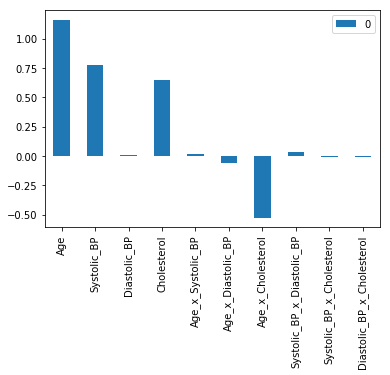

In [116]:
int_coeffs = pd.DataFrame(data = model_X_int.coef_, columns = X_train_int.columns)
int_coeffs.T.plot.bar()

**Questions:**
> __Which variables are most important to the model?__<br>
> __Have the relevant variables changed?__<br>
> __What does it mean when the coefficients are positive or negative?__<br>

You may notice that Age, Systolic_BP, and Cholesterol have a positive coefficient. This means that a higher value in these three features leads to a higher prediction probability for the disease. You also may notice that the interaction of Age x Cholesterol has a negative coefficient. This means that a higher value for the Age x Cholesterol product reduces the prediction probability for the disease.

To understand the effect of interaction terms, let's compare the output of the model we've trained on sample cases with and without the interaction. Run the cell below to choose an index and look at the features corresponding to that case in the training set. 

In [118]:
index = 3432
case = X_train_int.iloc[index, :]
print(case)

Age                           2.502061
Systolic_BP                   1.713547
Diastolic_BP                  0.268265
Cholesterol                   2.146349
Age_x_Systolic_BP             4.287400
Age_x_Diastolic_BP            0.671216
Age_x_Cholesterol             5.370296
Systolic_BP_x_Diastolic_BP    0.459685
Systolic_BP_x_Cholesterol     3.677871
Diastolic_BP_x_Cholesterol    0.575791
Name: 5970, dtype: float64


We can see that they have above average Age and Cholesterol. We can now see what our original model would have output by zero-ing out the value for Cholesterol and Age.

In [119]:
new_case = case.copy(deep=True)
new_case.loc["Age_x_Cholesterol"] = 0
new_case

Age                           2.502061
Systolic_BP                   1.713547
Diastolic_BP                  0.268265
Cholesterol                   2.146349
Age_x_Systolic_BP             4.287400
Age_x_Diastolic_BP            0.671216
Age_x_Cholesterol             0.000000
Systolic_BP_x_Diastolic_BP    0.459685
Systolic_BP_x_Cholesterol     3.677871
Diastolic_BP_x_Cholesterol    0.575791
Name: 5970, dtype: float64

In [120]:
print(f"Output with interaction: \t{model_X_int.predict_proba([case.values])[:, 1][0]:.4f}")
print(f"Output without interaction: \t{model_X_int.predict_proba([new_case.values])[:, 1][0]:.4f}")

Output with interaction: 	0.9448
Output without interaction: 	0.9965


**Expected output**
```CPP
Output with interaction: 0.9448
Output without interaction: 0.9965
```

We see that the model is less confident in its prediction with the interaction term than without (the prediction value is lower when including the interaction term). With the interaction term, the model has adjusted for the fact that the effect of high cholesterol becomes less important for older patients compared to younger patients.